## Employee turnover prediction

### Problem Statement

Use a dataset of employee information and
build a model that can predict which
employees are most likely to leave the
company

### Import Necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings                    
warnings.filterwarnings("ignore")

### Load DataSet

In [3]:
data = pd.read_csv("attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.drop_duplicates(inplace = True)
data.shape

(1470, 35)

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Dropping unnecessay columns

In [8]:
columns_drop=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
data.drop(columns=columns_drop, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Univariate analysis

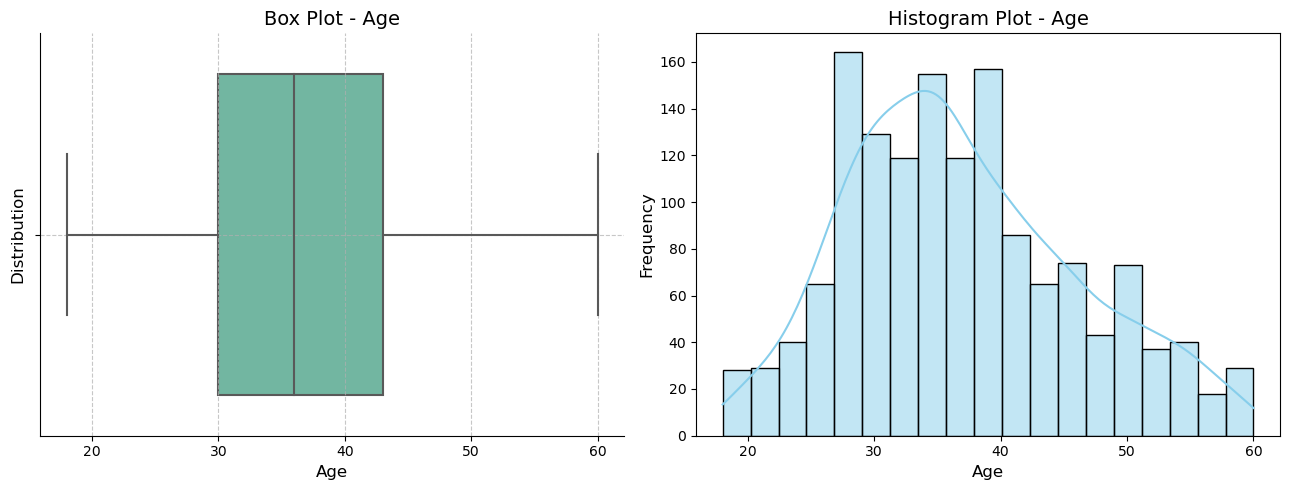

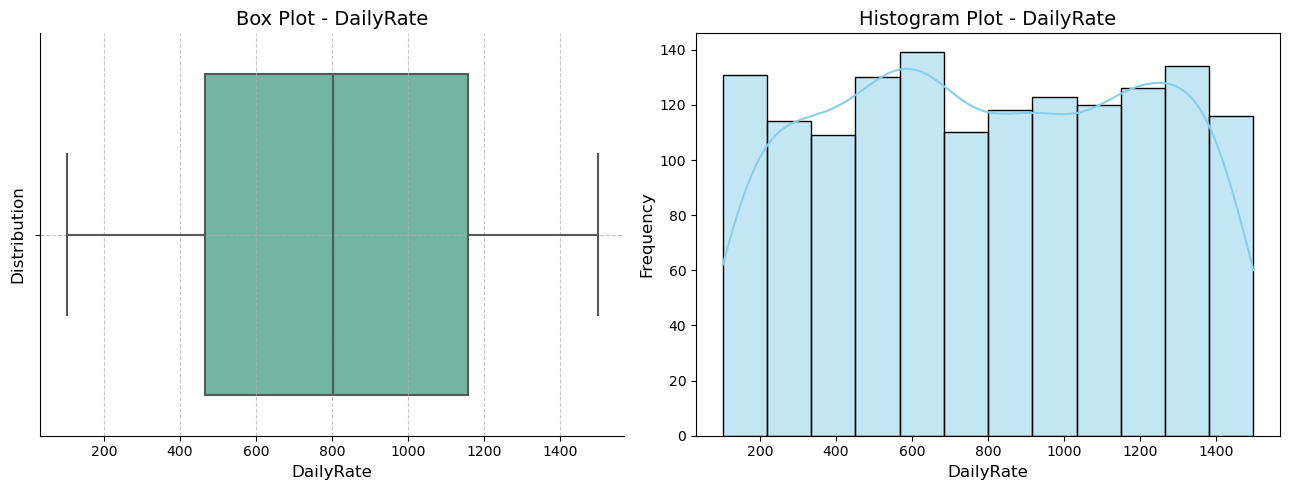

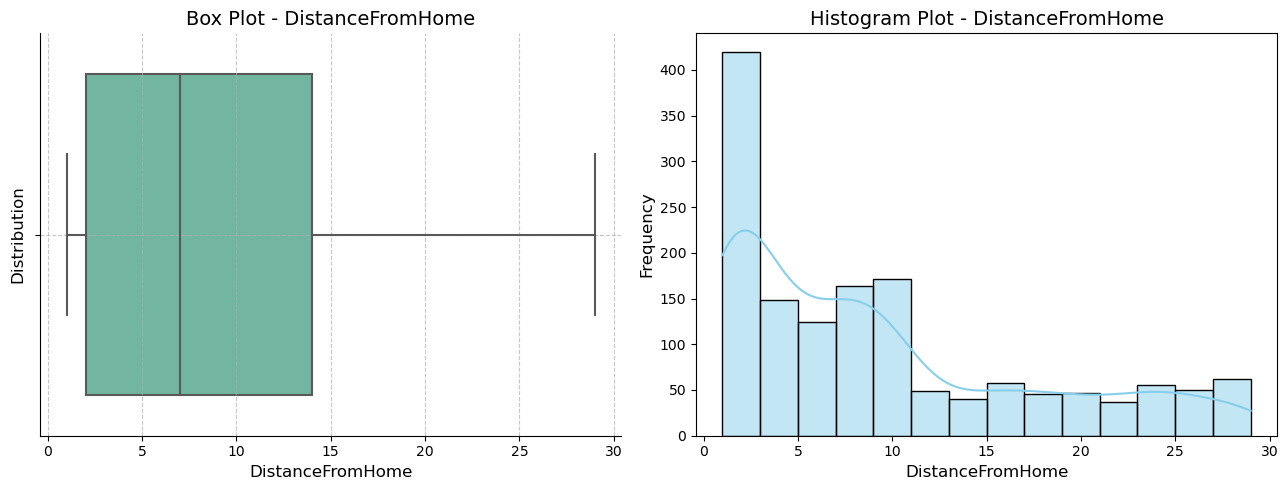

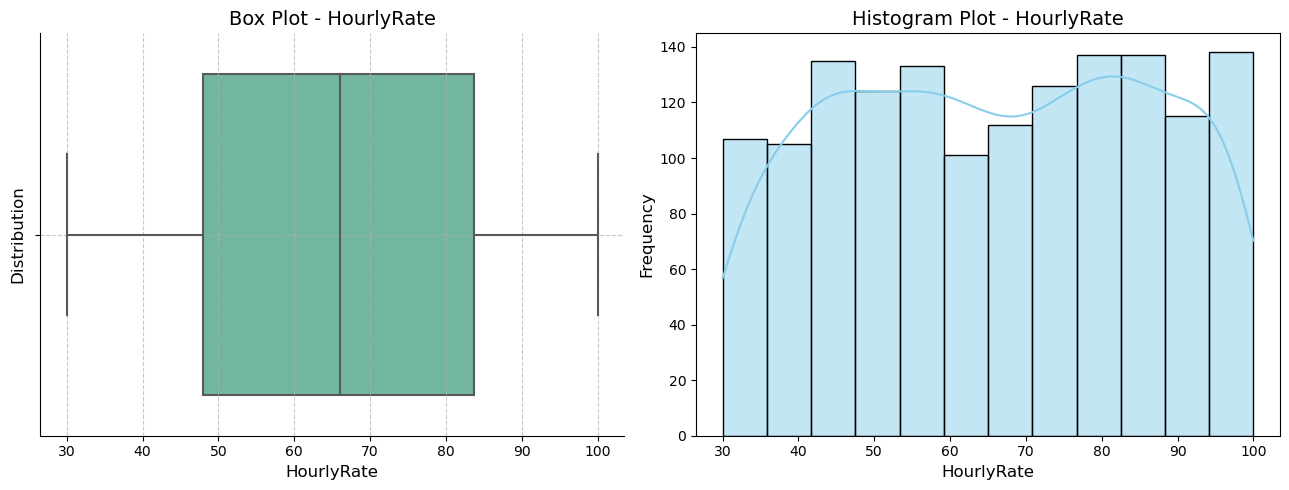

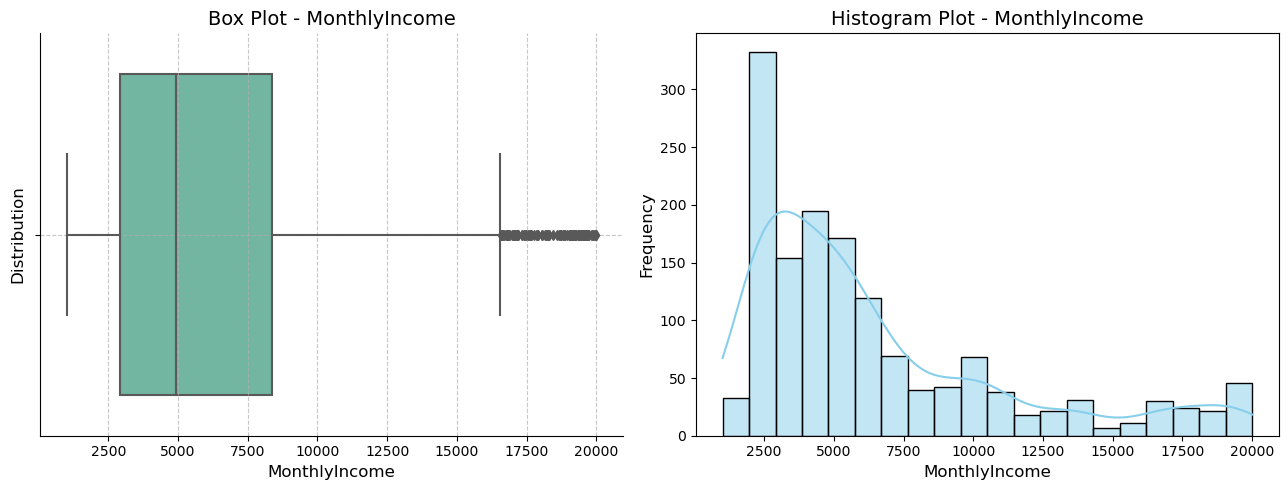

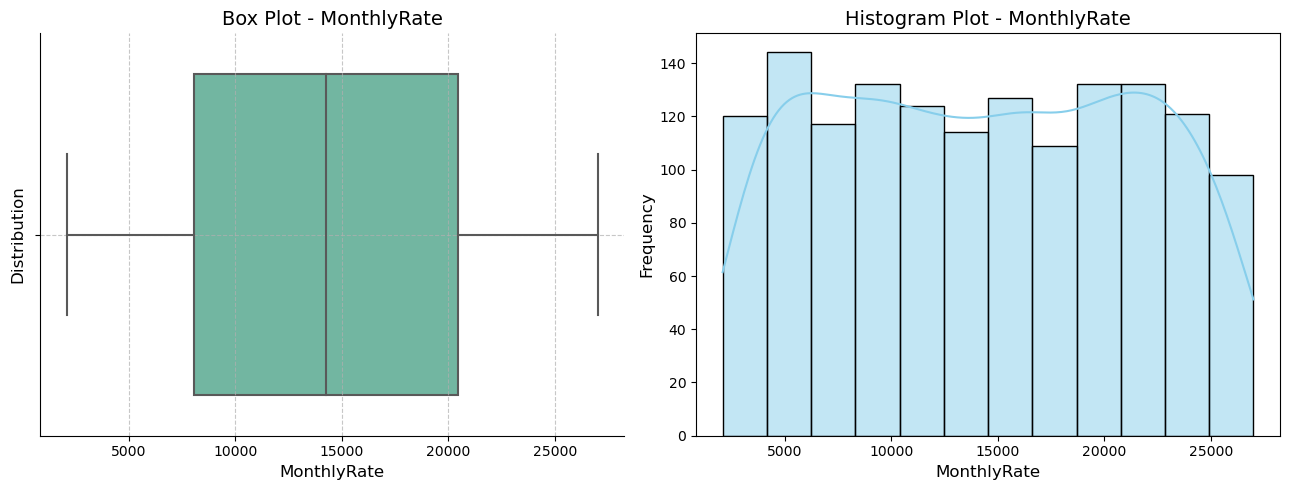

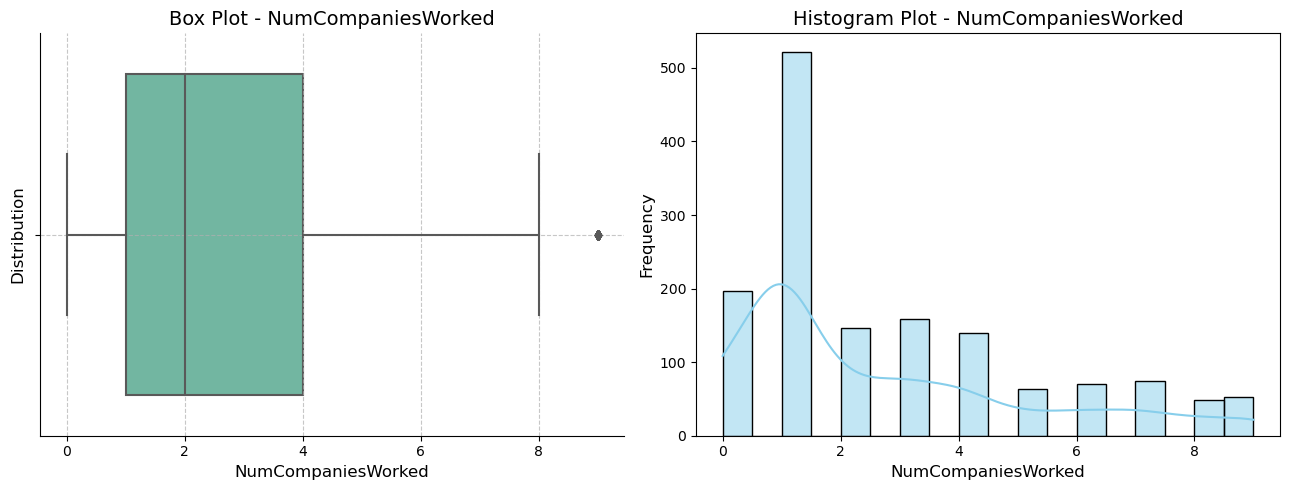

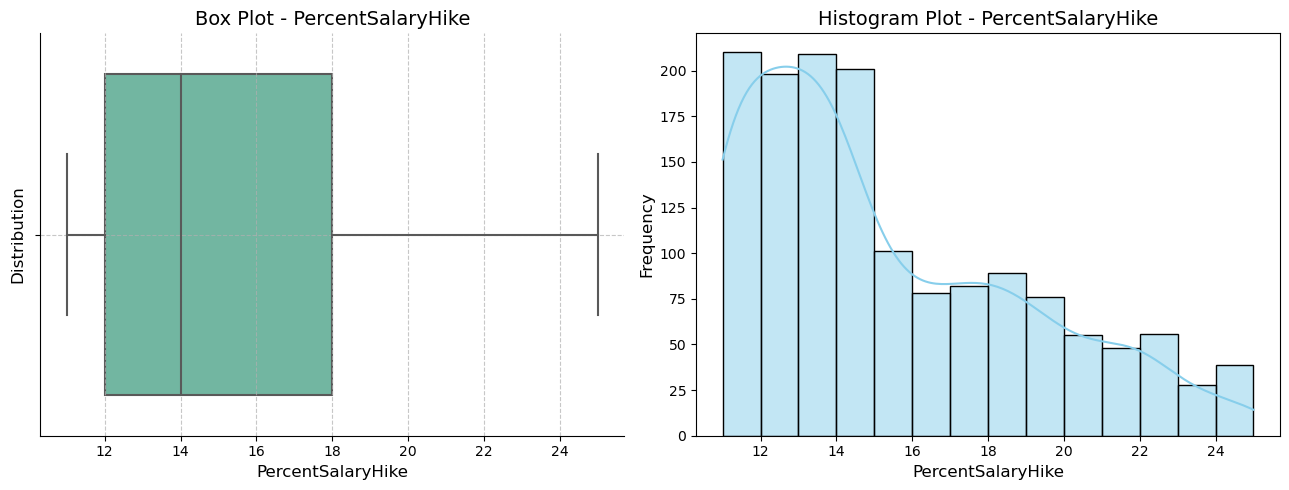

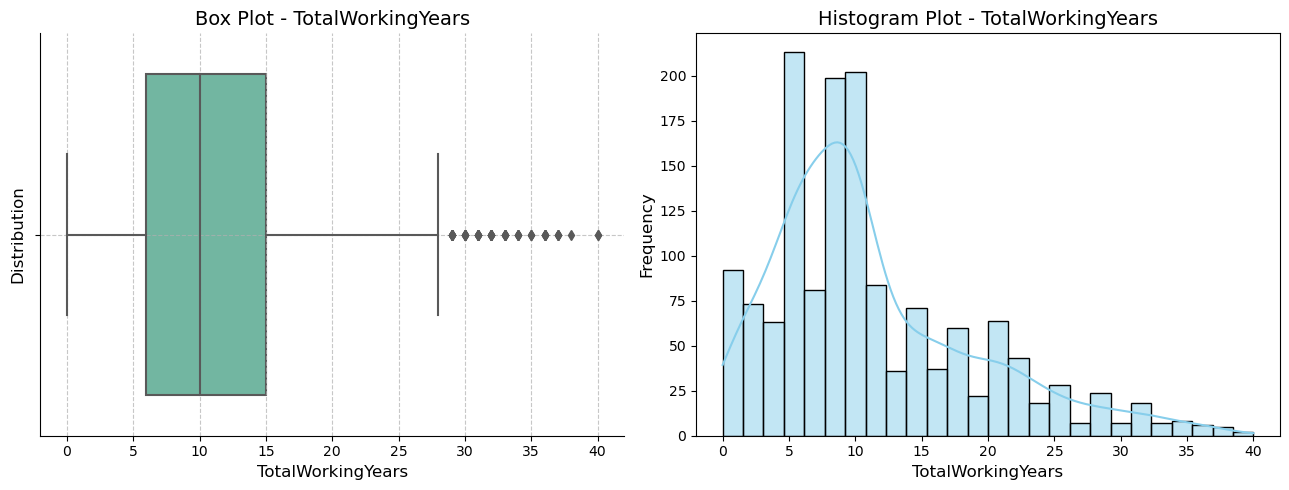

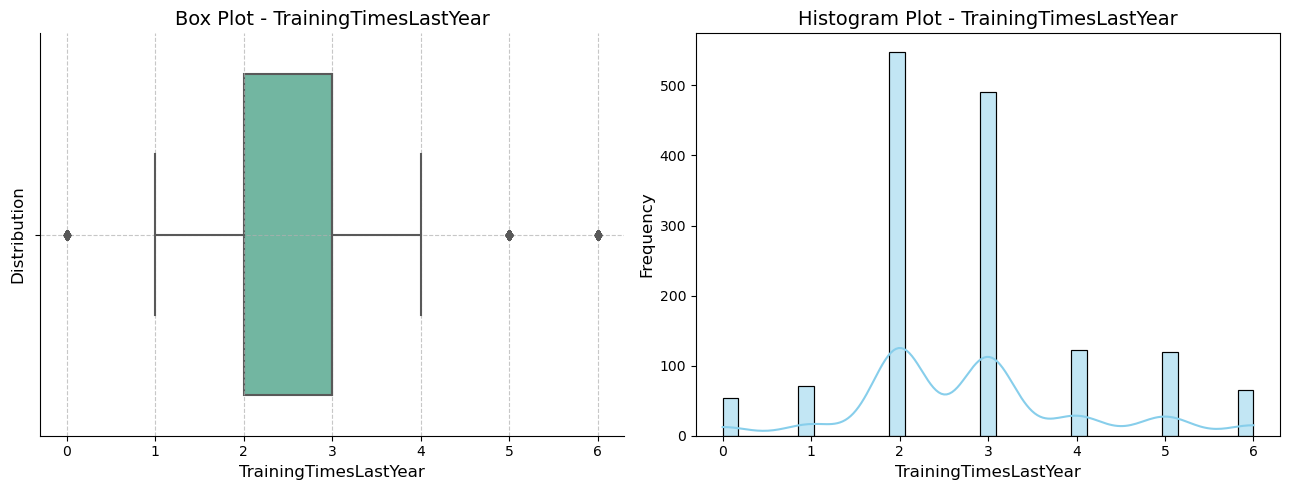

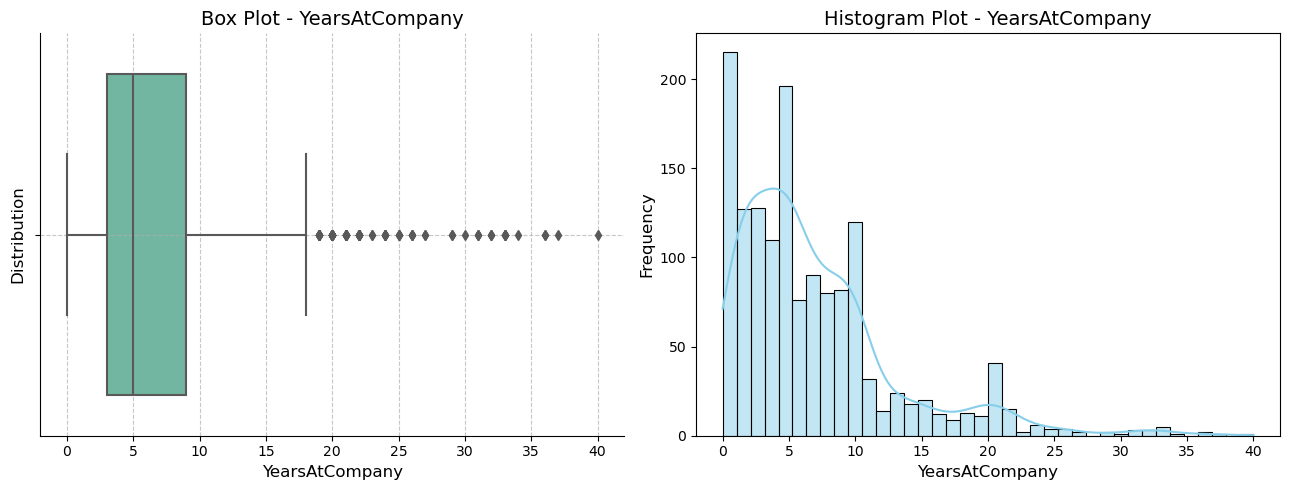

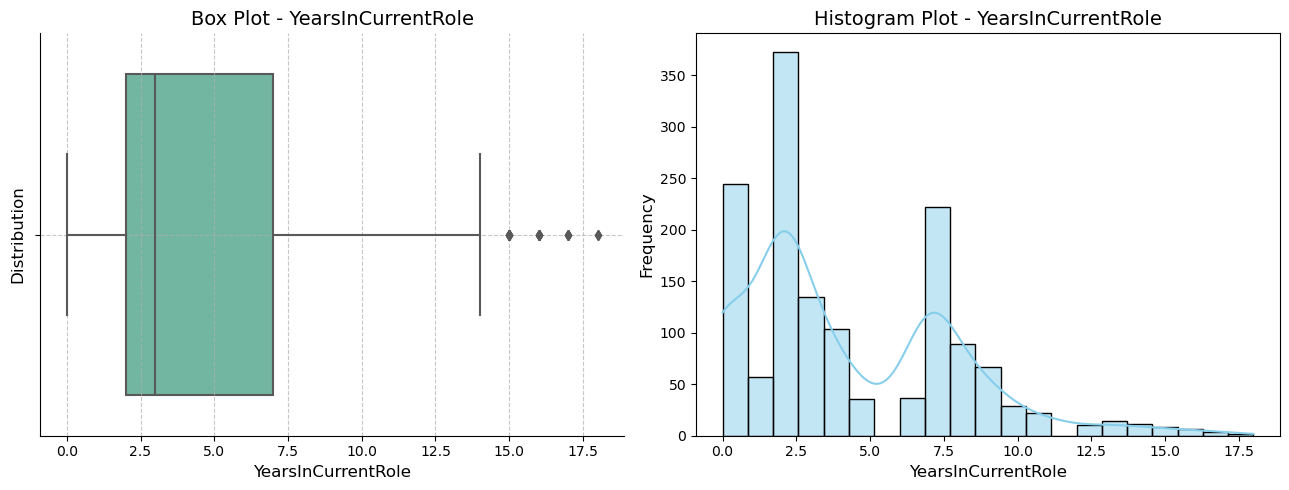

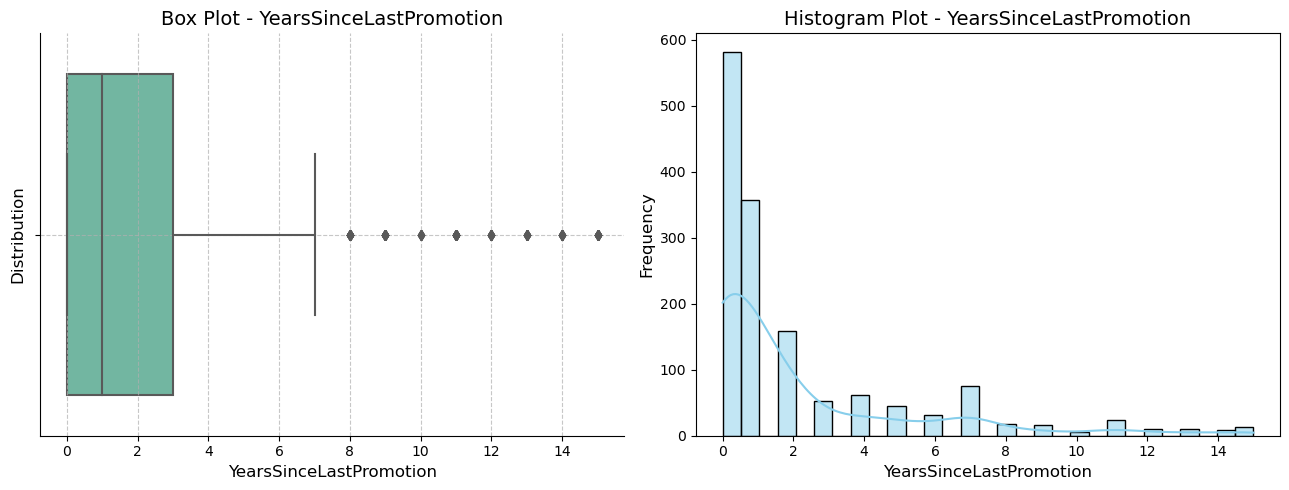

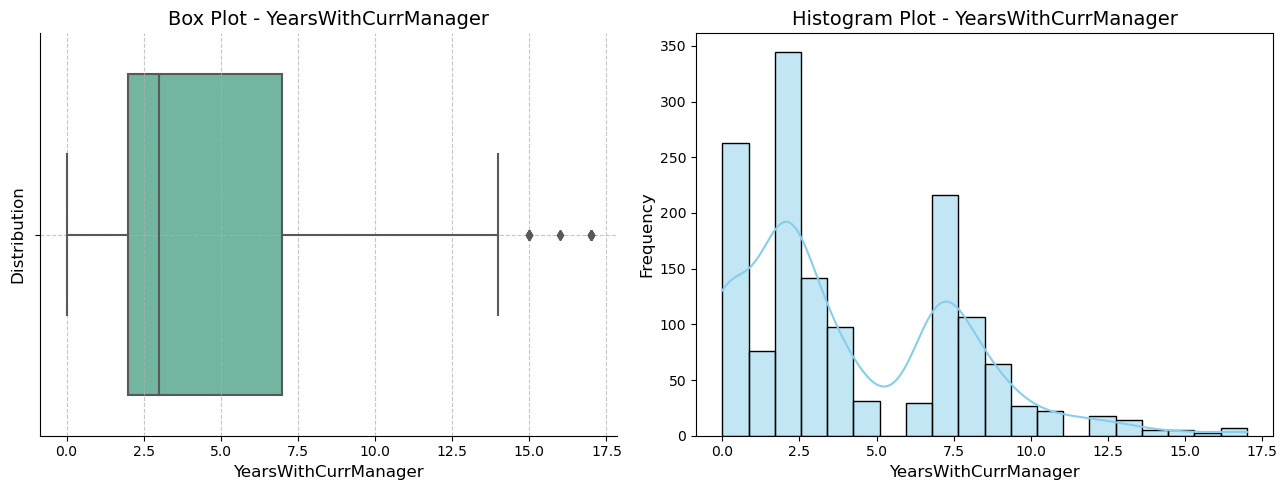

In [10]:
columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 
'YearsSinceLastPromotion', 'YearsWithCurrManager']

for each in columns:
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

    # Box Plot 
    sns.boxplot(x=each, data=data, ax=ax1, palette="Set2")
    ax1.set_xlabel(each, fontsize=12)  
    ax1.set_ylabel("Distribution", fontsize=12)  
    ax1.set_title(f"Box Plot - {each}", fontsize=14)  
    ax1.tick_params(labelsize=10)

    # Customize the appearance of the Box plot
    sns.despine(ax=ax1) 
    ax1.grid(True, linestyle='--', alpha=0.7) 

    # Histogram
    sns.histplot(data=data, x=each, kde=True, ax=ax2, color="skyblue") 
    ax2.set_xlabel(each, fontsize=12)
    ax2.set_ylabel("Frequency", fontsize=12)  
    ax2.set_title(f"Histogram Plot - {each}", fontsize=14)
    ax2.tick_params(labelsize=10)

    # Adjust layout for better spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

<Axes: >

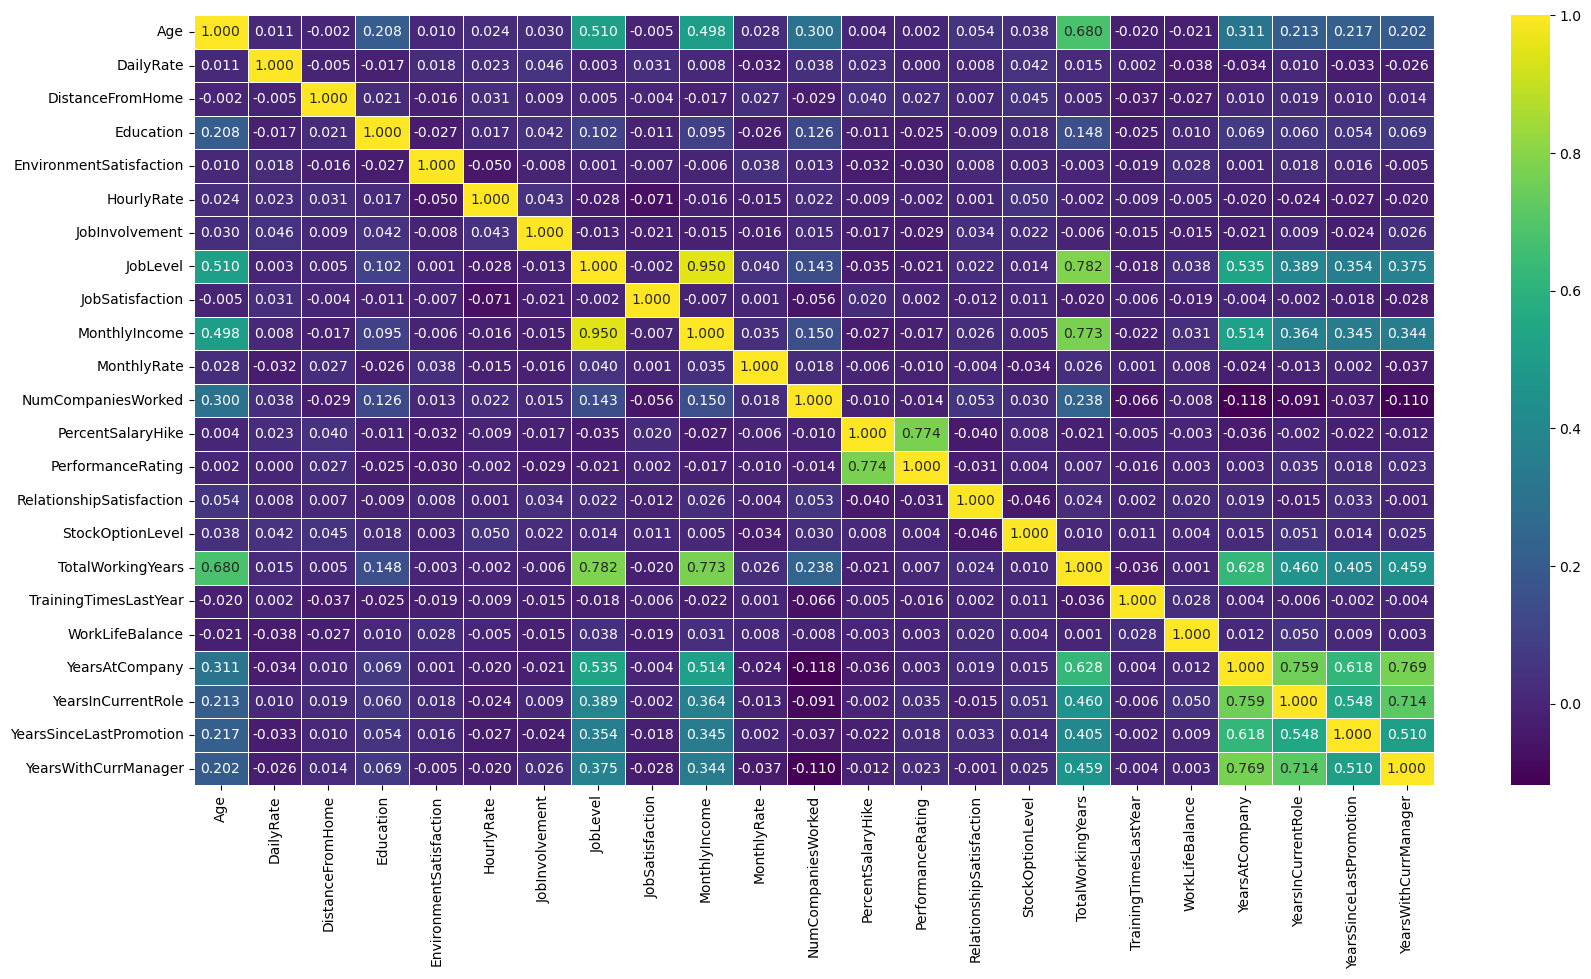

In [12]:
plt.figure(figsize = (20,10)) #fining correlation
sns.heatmap(data.corr(),
           annot = True,
           linewidth = .5,
           cmap = "viridis",
           fmt='.3f')

### Removing Outliers

In [13]:
def RemoveOutliers(df, col_name):
    q1 = df[col_name].quantile(.25)
    q3 = df[col_name].quantile(.75)
    iqr = q3 - q1
    upperlimit = q3 + (1.5 * iqr)
    lowerlimit = q1 - (1.5 * iqr)
    a = df[col_name] > upperlimit
    b = df[col_name] < lowerlimit
    df[col_name] = np.where(a, upperlimit, df[col_name])
    df[col_name] = np.where(b, lowerlimit, df[col_name])
    return df

In [14]:
data = RemoveOutliers(data, 'MonthlyIncome')
data = RemoveOutliers(data, 'YearsAtCompany')
data = RemoveOutliers(data, 'YearsSinceLastPromotion')

### Label Encoding

In [15]:
data['BusinessTravel'] = data['BusinessTravel'].map({'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2})
data['Department'] = data['Department'].map({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2})
data['EducationField'] = data['EducationField'].map({'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 
                                                    'Technical Degree': 4, 'Human Resources': 5})
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
data['JobRole'] = data['JobRole'].map({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2,
                                       'Manufacturing Director': 3, 'Healthcare Representative': 4, 
                                       'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 
                                      'Human Resources': 8})
data['MaritalStatus'] = data['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
data['OverTime'] = data['OverTime'].map({'Yes': 0, 'No': 1})
data['Attrition'] = data['Attrition'].map({'Yes': 0, 'No': 1})


### One Hot Encoding

In [17]:
data1 = pd.read_csv('attrition.csv') 
dataOneHotEn = pd.get_dummies(data1, drop_first = True)
dataOneHotEn.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


### Balancing and Normalising Data

In [18]:
from scipy.stats import zscore
datascaled = data.apply(zscore)
datascaled.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,-2.280906,-0.590048,0.742527,-1.401512,-1.010909,-0.891688,-1.021863,-0.660531,-1.224745,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.123832,-0.063296,-0.776139,0.245834
1,1.322365,0.438422,0.913194,-1.297775,0.493817,-0.147150,-1.868426,-1.021863,0.254625,0.816497,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.678078,0.764998,-0.372486,0.806541
2,0.008343,-2.280906,-0.590048,1.414363,0.493817,-0.887515,-0.891688,-0.323194,1.169781,0.816497,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.326697,-1.167687,-0.776139,-1.155935
3,-0.429664,0.438422,0.913194,1.461466,0.493817,-0.764121,1.061787,-1.021863,1.169781,-1.224745,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.277123,0.764998,0.434819,-1.155935
4,-1.086676,0.438422,-0.590048,-0.524295,0.493817,-0.887515,-1.868426,0.375475,-1.575686,0.816497,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.925742,-0.615492,0.031166,-0.595227


In [19]:
# Using SMOTE for imbalanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 8)

In [20]:
y = data['Attrition']
X = data.drop(['Attrition'], axis=1)

In [21]:
XNew, yNew = sm.fit_resample(X,y)

<Axes: >

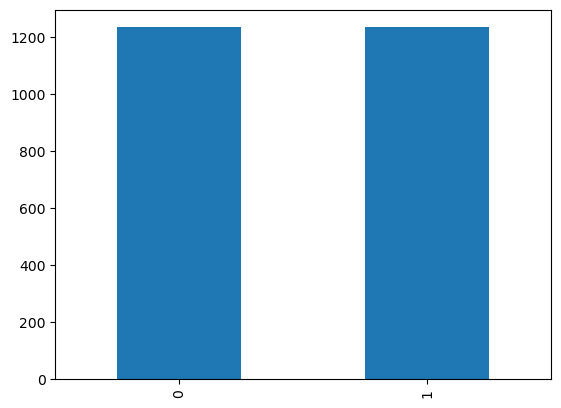

In [22]:
pd.Series(yNew).value_counts().plot(kind='bar')

### Splitting dataset into Test_set and Train_set

In [23]:
from sklearn.model_selection import train_test_split # Split into training and test set

XTrain, XTest, YTrain, YTest = train_test_split(data.drop('Attrition', axis=1), data['Attrition'], test_size = .3,
                                               random_state = 8)
XTrain.shape, XTest.shape

((1029, 30), (441, 30))

### Fitting data into model

In [24]:
from sklearn.tree import DecisionTreeClassifier

model_entropy = DecisionTreeClassifier(criterion='entropy')
DTModel = model_entropy.fit(XTrain, YTrain)

In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

TrSDTPred = DTModel.predict(XTrain)
TeSDTPred = DTModel.predict(XTest)
TrSAccDT = accuracy_score(YTrain, TrSDTPred)
TeSAccDT = accuracy_score(YTest, TeSDTPred)
TeSRecDT = recall_score(YTrain, TrSDTPred)
TeSPreDT = precision_score(YTest, TeSDTPred)

TempResultsDf = pd.DataFrame({'Method': ['Decision Tree'], 'TrainingAccuracy': [TrSAccDT], 'TestAccuracy': TeSAccDT,
                         'TestRecall': TeSRecDT, 'TestPrecision': TeSPreDT})
ResultsDf = TempResultsDf
TempResultsDf

,Method,TrainingAccuracy,TestAccuracy,TestRecall,TestPrecision
0,Decision Tree,1.0,0.793651,1.0,0.874332
